<a href="https://colab.research.google.com/github/siddh1990/Data-Driven-Pump-it-Up/blob/main/Data_Driven_Pump_it_Up_Raw_Voting_(Random_F_%2B_Light_GBM_%2B_XGboost)_02_12_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
data_x=pd.read_csv("/content/Train set values.csv")
data_y=pd.read_csv("/content/Train set labels.csv")

In [55]:
data=pd.merge(data_x,data_y,on="id",how="inner")

## Splitting the data into training and testing

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data_x,data_y,train_size=0.7,random_state=42,stratify=data_y["status_group"])

## Data Exploration

In [57]:
x_train

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
5974,71045,0.0,2013-04-04,Government Of Tanzania,1410,DWE,36.667568,-3.353465,Kanisani,0,...,unknown,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
31787,51874,0.0,2013-01-16,Gachuma Ginery,1161,GACHUMA GINERY,33.637501,-2.139160,Kiwandani,0,...,unknown,soft,good,enough,enough,lake,river/lake,surface,communal standpipe multiple,communal standpipe
27800,42688,0.0,2013-03-14,Vwc,1184,VWC,36.854557,-2.977996,Shuleni,0,...,on failure,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe
8008,53295,0.0,2011-08-06,Government Of Tanzania,0,GOVERN,33.023974,-2.933736,Kwa John,0,...,never pay,soft,good,enough,enough,lake,river/lake,surface,communal standpipe multiple,communal standpipe
39725,67849,0.0,2013-02-18,World Bank,1331,Government,36.528004,-5.674631,Kwa Msanyi,0,...,never pay,salty,salty,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21108,71918,0.0,2012-10-14,Rural Water Supply And Sanitat,0,DWE,31.913740,-3.372796,Mwabasabi,0,...,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
14847,35745,20.0,2011-02-21,Woyege,52,WOYEGE,39.219207,-7.002206,Woyege,0,...,per bucket,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
26579,7708,50.0,2011-02-26,Finland,99,DWE,38.857796,-6.783685,Hassan Mkumbi,0,...,per bucket,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe
8192,64193,30.0,2013-02-07,Finida German Tanzania Govt,426,Finwater,39.348550,-10.642069,Tangini,0,...,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe


In [58]:
x_train[x_train.select_dtypes(include="O").columns]

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
5974,2013-04-04,Government Of Tanzania,DWE,Kanisani,Pangani,Inyuata,Arusha,Arusha Rural,Kiranyi,True,...,unknown,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
31787,2013-01-16,Gachuma Ginery,GACHUMA GINERY,Kiwandani,Lake Victoria,Mtakuja,Mara,Bunda,Butimba,NaN,...,unknown,soft,good,enough,enough,lake,river/lake,surface,communal standpipe multiple,communal standpipe
27800,2013-03-14,Vwc,VWC,Shuleni,Internal,Madukani,Arusha,Longido,Tingatinga,True,...,on failure,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe
8008,2011-08-06,Government Of Tanzania,GOVERN,Kwa John,Lake Victoria,Isaka,Mwanza,Missungwi,Kasololo,False,...,never pay,soft,good,enough,enough,lake,river/lake,surface,communal standpipe multiple,communal standpipe
39725,2013-02-18,World Bank,Government,Kwa Msanyi,Wami / Ruvu,Chapakazi,Manyara,Kiteto,Songambele,True,...,never pay,salty,salty,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21108,2012-10-14,Rural Water Supply And Sanitat,DWE,Mwabasabi,Lake Tanganyika,Mwabasabi,Shinyanga,Bukombe,Ushirombo,True,...,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
14847,2011-02-21,Woyege,WOYEGE,Woyege,Wami / Ruvu,Kimbangulile,Pwani,Mkuranga,Tambani,True,...,per bucket,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
26579,2011-02-26,Finland,DWE,Hassan Mkumbi,Wami / Ruvu,Vikuge,Pwani,Kibaha,Soga,True,...,per bucket,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe
8192,2013-02-07,Finida German Tanzania Govt,Finwater,Tangini,Ruvuma / Southern Coast,Tangini,Mtwara,Newala,Kitangari,True,...,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe


In [59]:
#Numerical Features Description
x_train.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,41580.000000,41580.000000,41580.000000,41580.000000,4.158000e+04,41580.000000,41580.000000,41580.000000,41580.000000,41580.000000
mean,37053.095238,328.297768,670.883333,34.088923,-5.716324e+00,0.500000,15.198509,5.593218,180.270178,1303.064791
std,21379.253543,3380.560532,693.624472,6.541418,2.940352e+00,14.103926,17.463795,9.575067,462.724333,950.851187
min,0.000000,0.000000,-63.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18530.750000,0.000000,0.000000,33.097738,-8.543252e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37055.500000,0.000000,374.000000,34.911885,-5.036156e+00,0.000000,12.000000,3.000000,27.500000,1986.000000
75%,55351.250000,25.000000,1322.000000,37.169114,-3.328690e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.344301,-2.000000e-08,1776.000000,99.000000,80.000000,15300.000000,2013.000000


In [60]:
#Categorical Features Description
x_train.describe(include="O")

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,41580,39034,39025,41580,41580,41336,41580,41580,41580,39283,...,41580,41580,41580,41580,41580,41580,41580,41580,41580,41580
unique,346,1611,1802,27265,9,16078,21,124,2073,2,...,7,8,6,5,5,10,7,3,7,6
top,2011-03-17,Government Of Tanzania,DWE,none,Lake Victoria,Majengo,Iringa,Njombe,Igosi,True,...,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,410,6405,12204,2546,7058,364,3752,1769,222,35748,...,17792,35496,35496,23232,23232,11944,11944,32085,19911,24183


In [61]:
# Description of Feature "num_private" not provided in the DataDriven. Hence, checking for its value_counts.
x_train.num_private.value_counts(normalize=True,dropna=False).head(20)

0      0.987422
6      0.001299
1      0.001227
8      0.000890
5      0.000770
32     0.000746
39     0.000529
7      0.000505
2      0.000481
45     0.000481
93     0.000409
15     0.000409
47     0.000385
102    0.000361
3      0.000337
4      0.000337
65     0.000313
80     0.000265
20     0.000265
25     0.000241
Name: num_private, dtype: float64

In [62]:
# Checking value_counts for Feature: "recorded_by"
x_train.recorded_by.value_counts(normalize=True,dropna=False)

GeoData Consultants Ltd    1.0
Name: recorded_by, dtype: float64

In [63]:
# Checking datatype and unique values of each feature
def dtype_null(i):
    dt=[]
    n=[]
    u=[]
    for a in i.columns:
        dt.append(np.dtype(i[a]))
        n.append(i[a].isna().sum())
        u.append(i[a].nunique())
    fea_des=np.column_stack((i.columns,dt,n,u))
    fea_des=pd.DataFrame(fea_des,columns=["Feature","dtype","null","unique"])
    print(fea_des)
dtype_null(x_train)

                  Feature    dtype   null unique
0                      id    int64      0  41580
1              amount_tsh  float64      0     93
2           date_recorded   object      0    346
3                  funder   object   2546   1611
4              gps_height    int64      0   2385
5               installer   object   2555   1802
6               longitude  float64      0  40285
7                latitude  float64      0  40283
8                wpt_name   object      0  27265
9             num_private    int64      0     58
10                  basin   object      0      9
11             subvillage   object    244  16078
12                 region   object      0     21
13            region_code    int64      0     27
14          district_code    int64      0     20
15                    lga   object      0    124
16                   ward   object      0   2073
17             population    int64      0    948
18         public_meeting   object   2297      2
19            record

In [64]:
# Checking Feature:amount_tsh

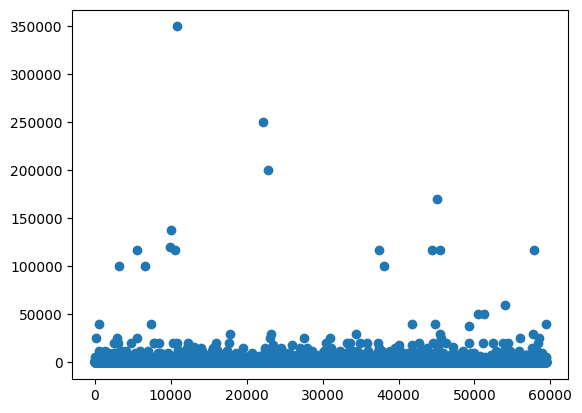

In [65]:
plt.plot(x_train["amount_tsh"],"o")

(0.0, 50000.0)

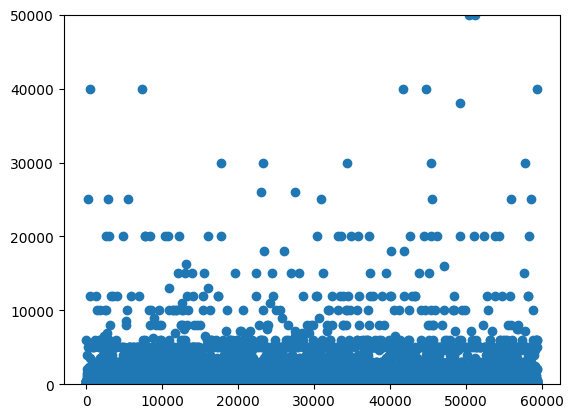

In [66]:
plt.plot(x_train["amount_tsh"],"o", )
plt.ylim(0,50000)

(0.0, 10000.0)

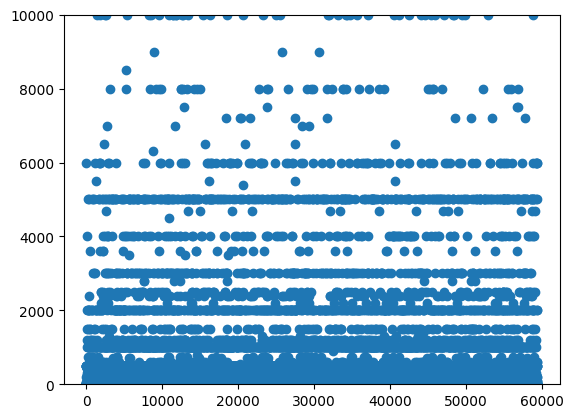

In [67]:
plt.plot(x_train["amount_tsh"],"o", )
plt.ylim(0,10000)

In [68]:
x_train.amount_tsh.value_counts(normalize=True,dropna=False) # 70% of amount_tsh is 0.

0.0       0.699880
500.0     0.052982
50.0      0.041053
1000.0    0.025349
20.0      0.024916
            ...   
6300.0    0.000024
0.2       0.000024
12.0      0.000024
53.0      0.000024
26.0      0.000024
Name: amount_tsh, Length: 93, dtype: float64

In [69]:
## gps_height

In [70]:
x_train["gps_height"].value_counts(normalize=True)

 0       0.342665
-20      0.000986
-16      0.000938
-15      0.000938
-13      0.000914
           ...   
 2255    0.000024
 660     0.000024
 2552    0.000024
 2002    0.000024
 533     0.000024
Name: gps_height, Length: 2385, dtype: float64

<Axes: xlabel='gps_height', ylabel='Count'>

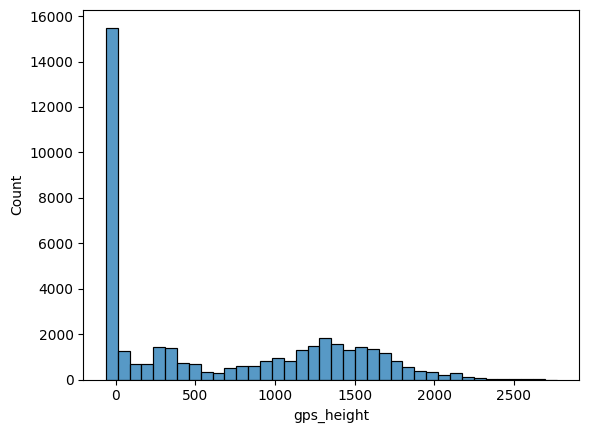

In [71]:
sns.histplot(x_train.gps_height)

In [72]:
# construction_year

In [73]:
x_train["construction_year"].value_counts(normalize=True,dropna=False).head(20)

0       0.347427
2010    0.045022
2008    0.044204
2009    0.042761
2000    0.034993
2007    0.026816
2006    0.024940
2003    0.021645
2011    0.020779
2004    0.019240
2012    0.018110
2002    0.017797
1995    0.017508
2005    0.017292
1978    0.017124
1990    0.016691
1998    0.016570
1999    0.016114
1985    0.015849
1996    0.013733
Name: construction_year, dtype: float64

In [74]:
## funder and installer

In [75]:
x_train.loc[x_train.funder.isna()==True].installer.value_counts(dropna=False)

NaN                 2506
DW                    13
DWE                    7
ISSAC MOLLEL           3
VWC                    2
Gove                   2
DHV Moro               1
MINISTRYOF WATER       1
OXFAM                  1
Angli                  1
HESAWA                 1
ISSAC MOLLEl           1
marafip                1
UNICEF                 1
rc ch                  1
Shule                  1
GOVERNMENT             1
GOVER                  1
WORLD VISION           1
Name: installer, dtype: int64

## Data Processing

In [76]:
# making a copy of x_train and y_train. All processing will be done on the copies.

In [77]:
x_train_2=x_train
y_train_2=y_train

In [78]:
def process(a,b):
    a=a.drop(["id","num_private"],axis=1)
    b=b.drop("id",axis=1)
    a["amount_tsh_cat"] = a["amount_tsh"].apply(lambda x: 0 if x == 0 else 1)
    date_format = '%Y-%m-%d'
    a["date_recorded"]=pd.to_datetime(a["date_recorded"])
    a["dsr"]=pd.to_datetime("2023-11-16")-a["date_recorded"]
    a.dsr=(a.dsr/ pd.Timedelta(seconds=86400)).astype("O")
    #bin_edges=[np.min(a.gps_height)-1,0,500,1000,1500,2000,np.max(a.gps_height)]
    #bin_labels=["<0","0-500","500-1000","1000-1500","1500-2000",">2000"]
    #a["gps_height_cat"]=pd.cut(a.gps_height,bins=bin_edges,labels=bin_labels).astype("O")
    a["long_mod"]=a["longitude"]
    a.loc[a['long_mod'] == 0, 'long_mod'] = pd.NA
    grp_means=a.groupby(by=["region"])["long_mod"].transform("mean")
    a.long_mod=a.long_mod.fillna(grp_means)
    a["lat_mod"]=a["latitude"]
    a.loc[a['lat_mod'] <-100, 'lat_mod'] = pd.NA
    grp_means2=a.groupby(by=["region"])["lat_mod"].transform("mean")
    a.lat_mod=a.lat_mod.fillna(grp_means2)
    a["dst"]=np.sqrt(a["long_mod"]**2+a["lat_mod"]**2)
    #bin_edges=[np.min(a.construction_year)-1,0,1961,1971,1981,1991,2001,np.max(a.gps_height)+1]
    #bin_labels=["0","0-1960","1960-70","1970-80","1980-90","1990-2000","2001-2013"]
    #a["construction_year_cat"]=pd.cut(a.construction_year,bins=bin_edges,labels=bin_labels).astype("O")
    a=a.drop(["amount_tsh","date_recorded","latitude","longitude","lat_mod","long_mod"],axis=1)
    a["permit"]=a["permit"].map(lambda s: "T" if s==True else("F" if s== False else "M"))
    a["public_meeting"]=a["public_meeting"].map(lambda s: "T" if s==True else("F" if s== False else "M"))
    a[["region_code","district_code","amount_tsh_cat"]]=a[["region_code","district_code","amount_tsh_cat"]].astype("O")
    cat=a.select_dtypes(include="O").columns
    a[cat] = a[cat].fillna('missing')
    a[["region_code","district_code","amount_tsh_cat"]]=a[["region_code","district_code","amount_tsh_cat"]].astype("O")
    return a,b


In [79]:
x_train_2,y_train_2=process(x_train_2,y_train_2)

In [80]:
x_train_2.select_dtypes(include="O").columns

Index(['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'public_meeting',
       'recorded_by', 'scheme_management', 'scheme_name', 'permit',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'amount_tsh_cat'],
      dtype='object')

In [81]:
x_test_2,y_test_2=process(x_test,y_test)

In [82]:
col=x_train_2.select_dtypes(include="O").columns


In [83]:
col

Index(['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'public_meeting',
       'recorded_by', 'scheme_management', 'scheme_name', 'permit',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'amount_tsh_cat'],
      dtype='object')

In [84]:
## Categorical features encoding
from sklearn.preprocessing import LabelEncoder
Label_col=x_train_2.select_dtypes(include="O").columns
le=LabelEncoder()
for i in Label_col:
  le.fit(x_train_2[i])
  x_train_2[i]=le.transform(x_train_2[i])
  x_test_2[i] = x_test_2[i].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)

In [85]:
x_train_2

,funder,gps_height,installer,wpt_name,basin,subvillage,region,region_code,district_code,lga,...,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,amount_tsh_cat,dsr,dst
5974,381,1410,331,3734,5,2895,0,1,2,0,...,1,1,8,6,0,1,1,0,3878.0,36.820596
31787,352,1161,441,4913,4,10408,9,19,4,10,...,1,1,2,4,1,2,1,0,3956.0,33.705452
27800,1526,1184,1594,25858,0,7308,0,1,6,50,...,2,2,6,4,1,1,1,0,3899.0,36.974678
8008,381,0,454,8656,4,3026,13,18,7,67,...,1,1,2,4,1,2,1,0,4485.0,33.154029
39725,1583,1331,483,12239,8,1206,8,20,5,41,...,2,2,3,0,0,2,1,0,3923.0,36.966154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21108,1188,0,331,22144,3,10920,17,16,5,9,...,1,1,7,5,0,4,3,0,4050.0,32.091472
14847,1590,52,1659,27022,8,5150,14,23,13,69,...,2,2,7,5,0,4,3,1,4651.0,39.839391
26579,327,99,331,2331,8,15803,14,5,2,29,...,2,2,6,4,1,1,1,1,4646.0,39.445490
8192,325,426,434,26340,7,15114,12,25,12,88,...,2,2,3,0,0,2,1,1,3934.0,40.762262


In [86]:
x_test_2

,funder,gps_height,installer,wpt_name,basin,subvillage,region,region_code,district_code,lga,...,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,amount_tsh_cat,dsr,dst
19321,1470,1330,1487,-1,3,4641,5,15,1,30,...,1,1,7,5,0,4,3,0,3933.0,31.032435
9219,680,386,774,25858,7,14905,12,25,12,57,...,1,1,8,6,0,1,1,0,3941.0,40.595736
32072,1382,383,358,21803,7,-1,7,7,3,85,...,3,3,7,5,0,6,5,0,3956.0,40.080144
21900,275,0,331,-1,3,8034,19,13,4,122,...,1,1,7,5,0,4,3,0,4050.0,32.747369
55124,381,1341,331,-1,3,9461,5,15,2,28,...,1,1,6,4,1,1,1,1,3952.0,30.612332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46662,42,0,27,-1,8,3890,11,4,1,36,...,1,1,3,0,0,1,1,0,4598.0,37.724848
47190,381,1149,483,-1,4,11668,9,19,3,82,...,1,1,7,5,0,4,3,0,3986.0,33.453588
22764,78,1545,126,-1,4,-1,9,19,1,117,...,1,1,3,0,0,4,3,0,4004.0,34.645004
4087,1019,1203,1115,-1,3,4735,5,15,2,28,...,1,1,7,5,0,6,5,1,3931.0,30.400567


In [87]:
let=LabelEncoder()
let.fit(y_train_2["status_group"])
y_train_2["status_group"]=let.transform(y_train_2["status_group"])
y_test_2["status_group"]=let.transform(y_test_2["status_group"])

In [88]:
y_train_2

,status_group
5974,0
31787,0
27800,0
8008,2
39725,2
...,...
21108,1
14847,2
26579,2
8192,0


In [89]:
y_test_2

,status_group
19321,2
9219,1
32072,2
21900,2
55124,0
...,...
46662,2
47190,0
22764,2
4087,2


In [90]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
def matrix(xtr,ytr,xte,yte,est):
    print ("\n Train accuracy",round(accuracy_score(ytr, est.predict(xtr)),3))
    print ("\n Train Classification Report\n\n", classification_report(ytr, est.predict(xtr)))
    print ("\n Test accuracy", round(accuracy_score(yte, est.predict(xte)),3))
    print ("\n Test Classification Report\n\n", classification_report(yte, est.predict(xte)))

In [91]:
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [131]:
clf_xg=xgb.XGBClassifier(objective='multi:softmax',n_estimators= 300, max_depth = 8, learning_rate=0.09, max_bin= 60)
clf_RF = RandomForestClassifier(n_estimators= 300, max_depth= 16, min_samples_split= 5, class_weight="balanced")
clf_lgbm=LGBMClassifier(objective="multiclass",n_estimators= 400, learning_rate= 0.11,max_bin= 100)

In [132]:
from sklearn.ensemble import VotingClassifier

In [133]:
eclf1 = VotingClassifier(estimators=[('xg', clf_xg), ('rf', clf_RF), ('lgbm', clf_lgbm)], voting='hard')

In [134]:
eclf1.fit(x_train_2,y_train_2.values.ravel())

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007883 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1368
[LightGBM] [Info] Number of data points in the train set: 41580, number of used features: 36
[LightGBM] [Info] Start training from score -0.610510
[LightGBM] [Info] Start training from score -2.621700
[LightGBM] [Info] Start training from score -0.956469


VotingClassifier(estimators=[('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rat...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softmax', ...)),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=16,
                                                     min_samples_split=5,
                                                     n_estimators=300)),
                             ('lgbm',
                              LGBMClassifier(learning_rate=0.11, max_bin=100,
                                             n_estimators=400,
                                             objective='multiclass'))])

In [135]:
matrix(x_train_2,y_train_2,x_test_2,y_test_2,eclf1)


 Train accuracy 0.912

 Train Classification Report

               precision    recall  f1-score   support

           0       0.89      0.97      0.93     22581
           1       0.89      0.70      0.78      3022
           2       0.95      0.87      0.91     15977

    accuracy                           0.91     41580
   macro avg       0.91      0.85      0.87     41580
weighted avg       0.91      0.91      0.91     41580


 Test accuracy 0.803

 Test Classification Report

               precision    recall  f1-score   support

           0       0.79      0.91      0.84      9678
           1       0.59      0.29      0.38      1295
           2       0.85      0.76      0.80      6847

    accuracy                           0.80     17820
   macro avg       0.74      0.65      0.68     17820
weighted avg       0.80      0.80      0.79     17820



In [136]:
Target_x=pd.read_csv("/content/Test Set Values.csv")

In [137]:
Target1=Target_x

In [138]:
def process_target(a):
  a=a.drop(["id","num_private"],axis=1)
  a["amount_tsh_cat"] = a["amount_tsh"].apply(lambda x: 0 if x == 0 else 1)
  date_format = '%Y-%m-%d'
  a["date_recorded"]=pd.to_datetime(a["date_recorded"])
  a["dsr"]=pd.to_datetime("2023-11-16")-a["date_recorded"]
  a.dsr=(a.dsr/ pd.Timedelta(seconds=86400)).astype("O")
  #bin_edges=[np.min(a.gps_height)-1,0,500,1000,1500,2000,np.max(a.gps_height)]
  #bin_labels=["<0","0-500","500-1000","1000-1500","1500-2000",">2000"]
  #a["gps_height_cat"]=pd.cut(a.gps_height,bins=bin_edges,labels=bin_labels).astype("O")
  a["long_mod"]=a["longitude"]
  a.loc[a['long_mod'] == 0, 'long_mod'] = pd.NA
  grp_means=a.groupby(by=["region"])["long_mod"].transform("mean")
  a.long_mod=a.long_mod.fillna(grp_means)
  a["lat_mod"]=a["latitude"]
  a.loc[a['lat_mod'] <-100, 'lat_mod'] = pd.NA
  grp_means2=a.groupby(by=["region"])["lat_mod"].transform("mean")
  a.lat_mod=a.lat_mod.fillna(grp_means2)
  a["dst"]=np.sqrt(a["long_mod"]**2+a["lat_mod"]**2)
  #bin_edges=[np.min(a.construction_year)-1,0,1961,1971,1981,1991,2001,np.max(a.gps_height)+1]
  #bin_labels=["0","0-1960","1960-70","1970-80","1980-90","1990-2000","2001-2013"]
  #a["construction_year_cat"]=pd.cut(a.construction_year,bins=bin_edges,labels=bin_labels).astype("O")
  a=a.drop(["amount_tsh","date_recorded","latitude","longitude","lat_mod","long_mod"],axis=1)
  a["permit"]=a["permit"].map(lambda s: "T" if s==True else("F" if s== False else "M"))
  a["public_meeting"]=a["public_meeting"].map(lambda s: "T" if s==True else("F" if s== False else "M"))
  a[["region_code","district_code","amount_tsh_cat"]]=a[["region_code","district_code","amount_tsh_cat"]].astype("O")
  cat=a.select_dtypes(include="O").columns
  a[cat] = a[cat].fillna('missing')
  a[["region_code","district_code","amount_tsh_cat"]]=a[["region_code","district_code","amount_tsh_cat"]].astype("O")
  return a

In [139]:
Target1=process_target(Target1)

In [140]:
x_train_3=x_train
x_train_3=process_target(x_train_3)
Label_col=x_train_3.select_dtypes(include="O").columns
le=LabelEncoder()
for i in Label_col:
  le.fit(x_train_3[i])
  x_train_3[i]=le.transform(x_train_3[i])
  Target1[i] = Target1[i].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)

In [141]:
y_pred=eclf1.predict(Target1)

In [142]:
y_pred

array([0, 0, 0, ..., 0, 0, 2])

In [143]:
y_pred=let.inverse_transform(y_pred)

In [144]:
y_pred

array(['functional', 'functional', 'functional', ..., 'functional',
       'functional', 'non functional'], dtype=object)

In [145]:
y_pred=pd.DataFrame(y_pred,columns=["status_group"])

In [146]:
y_pred["id"]=Target_x["id"]

In [147]:
y_pred=y_pred.loc[:,["id","status_group"]]

In [148]:
y_pred

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


In [149]:
y_pred.to_csv("\content\v_voting_classifier1.2_12_2023.csv",index=False)